# 明确分析问题
* 哪些用户可能会流失？
* 流失概率更高的用户有什么共同特征？

## **目录**  
**一、导入实验所需要的库和数据文件**  
 1.导入库  
 2.导入数据  
 3.查看数据集信息  
**二、数据处理**  
 1.查找缺失值  
 2.查看数据类型  
 3.转换类型  
 4.处理缺失值  
 5.数据替换  
**三、数据探索**  
 1.查看流失客户占比  
 2.性别、老年人、配偶、亲属对客户流失率的影响  
 3.提取特征和特征编码  
 4.相关性矩阵  
 5.热力图  
 6.one-hot编码  
 7.电信用户是否流失与各变量之间的相关性  
 8.网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无网络服务对客户流失率的影响  
 9.签订合同方式对客户流失率的影响  
 10.付款方式对客户流失率的影响  
**四、数据预处理**   
 1.剔除无关变量  
 2.标准化数值型变量  
 3.检查异常值  
 4.替换部分字段  
 5.类别型变量编码  
**五、构建模型**  
 1.建立训练数据集和测试数据集  
 2.选择机器学习算法  
 3.训练模型  
 4.评估模型  
**六、模型预测**  
**七、结论**

## 一、导入实验所需的库和数据文件

### 1. 导入库

In [5]:
#导入数据分析相关的库
import numpy as np
import pandas as pd
import os

#导入绘图与可视化相关的库
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams 
#pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。
#通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。

#导入机器学习相关的库
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #编码转换
from sklearn.preprocessing import StandardScaler #标准化处理
from sklearn.model_selection import StratifiedShuffleSplit #划分数据集
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.svm import SVC,LinearSVC #支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #KNN算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树分类器
# 下面四个是使用了提升方法的集成模型
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#导入度量模型好坏的测度的库
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix #混淆矩阵
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.metrics import make_scorer #这个函数封装了用于GridSearchCV和cross_val_score的评分函数，它接受一个评分函数，如accuracy_score、mean_squared_error、adjusted_rand_index或average_precision，并返回一个可调用的值，该值对学习器的输出进行评分。
from sklearn.ensemble import VotingClassifier #提供少数服从多数的投票方法

from sklearn.decomposition import PCA #降维
from sklearn.cluster import KMeans #K均值聚类
from sklearn.metrics import silhouette_score #轮廓系数，用于评价聚类的好坏

### 2. 导入数据

In [8]:
data = pd.read_csv('E:/Jupyter_file/我的项目/如何挽回更多的用户？——电信客户流失预测模型/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### 3. 查看数据集信息

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#查看数据集的大小
data.shape 

(7043, 21)

In [11]:
#获取数据类型列的描述统计信息
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


由上述分析可知，本数据集共有7043行数据，每行数据包含了21个特征变量。

## 二、数据处理

### 1. 查找缺失值

In [12]:
pd.isnull(data).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

由上可知此数据集没有缺失值，不需要进行缺失值填补或者删除的操作。
另外由于Churn列代表用户是否流失，与广告中的CTR点击率问题很像，通常它们的特征值分布及其不平衡，下面通过对Churn的不同特征值取值进行验证。

In [14]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

此数据集共有5174位用户未流失，1869位用户流失，该数据集类别不均衡。由于类别不平衡时，建立的模型往往会更偏向于数据量大的类别，导致模型的准确率看似不错，实际上对于数据量小的类别预测的效果很差，因此对于这种问题常常考虑给特征加入权重，以及用AUC值来衡量模型的好坏。（AUC值不会受到类别不均衡带来的影响）

### 2. 查看数据类型

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges代表总费用，原表中将其存为了object类型（在pandas中代表字符串格式）更改为float类型。

### 3. 转换类型

In [33]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

由于TotalCharges的类型发生了转换，这是有可能由于有些数据无法转换为数字而出现缺失值，因此需要再次统计缺失值的个数。

In [34]:
pd.isnull(data['TotalCharges']).sum()

11

11个缺失值相较于整体而言，不算多，因此我们直接删除这些缺失值。

### 4. 处理缺失值

In [35]:
data.dropna(inplace=True)
data.shape

(7032, 21)

### 5. 数据替换

与预测广告点击率类似，这里用户是否流失正是我们要预测的值，因此将其转化为0和1便于后续的建模

In [36]:
data['Churn'].replace(to_replace='Yes',value=1,inplace=True)
data['Churn'].replace(to_replace='No',value=0,inplace=True)
data['Churn'].head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

## 三、数据探索

### 1. 查看流失客户占比

In [38]:
churnvalue=data['Churn'].value_counts()
labels=data['Churn'].value_counts().index
print(churnvalue)
print(labels)

0    5163
1    1869
Name: Churn, dtype: int64
Int64Index([0, 1], dtype='int64')


Text(0.5, 1.0, '用户流失占比')

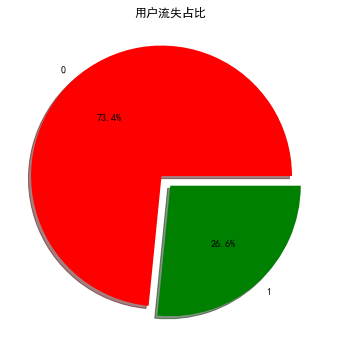

In [40]:
#绘制饼图（饼图适合展示占比情况）
rcParams['figure.figsize']=6,6 #设置图片的大小
rcParams['font.sans-serif'] = ['SimHei'] #图片中的文字用中文显示
plt.pie(churnvalue,labels=labels,colors=['red','green'],explode=(0.1,0),autopct='%1.1f%%',shadow=True)
plt.title('用户流失占比')

由饼图可看出，流失用户占据用户的26.6%。可与该行业的用户流失率平均值进行比较，判断电信的用户流失率是否是正常的。当然即使流失率在正常范围内，也应该追求不断减少流失率，这样才能保证持续的用户增长。

### 2. 性别、老年人、配偶、亲属对客户流失率的影响

Text(0.5, 1.0, 'Churn by Dependents')

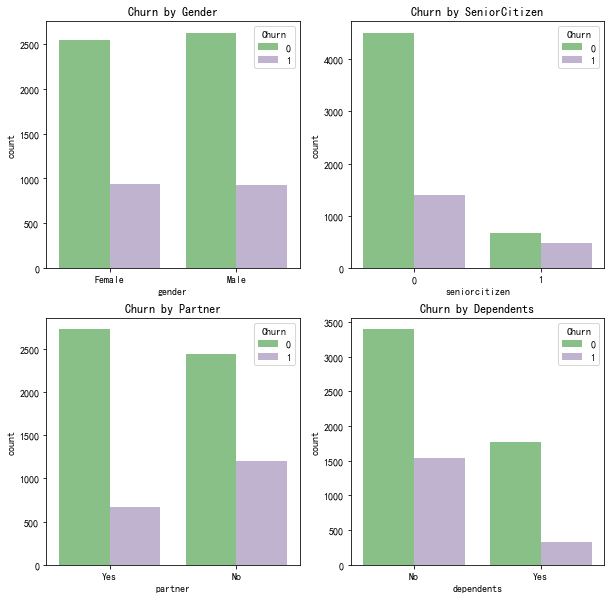

In [42]:
f,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10)) 
#创建一个2*2的画图区域，每张图的大小为10*10
#sns.countplot() 用于类别特征的频数条形图，可以画类别特征和y值（y值也是类别特征）的条形图
#观察不同性别对流失率是否有影响
plt.subplot(2,2,1)
gender=sns.countplot(x='gender',hue='Churn',data=data,palette='Accent')
plt.xlabel('gender')
plt.title('Churn by Gender')

#观察老年人对流失率是否有影响
plt.subplot(2,2,2)
gender=sns.countplot(x='SeniorCitizen',hue='Churn',data=data,palette='Accent')
plt.xlabel('seniorcitizen')
plt.title('Churn by SeniorCitizen')

#观察配偶对流失率是否有影响
plt.subplot(2,2,3)
gender=sns.countplot(x='Partner',hue='Churn',data=data,palette='Accent')
plt.xlabel('partner')
plt.title('Churn by Partner')

#观察经济独立对流失率是否有影响
plt.subplot(2,2,4)
gender=sns.countplot(x='Dependents',hue='Churn',data=data,palette='Accent')
plt.xlabel('dependents')
plt.title('Churn by Dependents')

由上图可看出，男性用户与女性用户的流失人数基本持平，说明性别对流失率并无影响；老年用户中的流失人数几乎快接近未流失人数，老年用户中的流失占比明显高于非老年用户；无配偶的用户的流失人数几乎是有配偶用户的流失人数的两倍；经济独立的用户流失人数远远小于经济未独立用户的流失人数。

### 3. 提取特征和特征编码  
离散特征的编码分为两种情况：  
（1）离散特征的取值之间没有大小意义，使用One-hot编码  
（2）离散特征的取值有大小意义，使用数值的映射

In [52]:
datamap = data.iloc[:,1:20] #将用户的特征变量提取出来
corrDf=datamap.apply(lambda x:pd.factorize(x)[0])
corrDf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


### 4. 相关性矩阵

In [44]:
corr=corrDf.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,0.001379,0.010349,-0.000265,-0.007515,-0.010284,-0.002236,-0.004365,0.011081,0.004526,0.000057,0.000578,-0.001339,0.000095,0.011902,-0.004928,-0.008017,-0.012153
SeniorCitizen,-0.001819,1.000000,-0.016957,-0.210550,0.012240,0.008392,0.113769,-0.032160,-0.210546,-0.144762,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,-0.156258,-0.093712,0.049154,0.022949
Partner,0.001379,-0.016957,1.000000,-0.452269,-0.100513,-0.018397,-0.118037,-0.000513,-0.081078,0.091536,-0.093391,-0.068277,-0.079066,-0.075310,-0.294094,-0.013957,-0.133280,-0.036518,-0.044214
Dependents,0.010349,-0.210550,-0.452269,1.000000,0.044138,-0.001078,-0.019178,0.044030,0.188889,0.061970,0.154819,0.179176,0.138809,0.125086,0.240556,0.110131,0.124002,-0.028706,0.009710
tenure,-0.000265,0.012240,-0.100513,0.044138,1.000000,-0.017864,0.064580,-0.012924,0.014436,-0.066232,0.034744,0.030489,0.024719,0.030252,0.118664,-0.013160,0.075533,0.042605,0.112813
PhoneService,-0.007515,0.008392,-0.018397,-0.001078,-0.017864,1.000000,0.674824,0.387266,0.125544,0.129432,0.138938,0.123533,0.171773,0.164379,0.003019,-0.016696,-0.003106,-0.141696,-0.030534
MultipleLines,-0.010284,0.113769,-0.118037,-0.019178,0.064580,0.674824,1.000000,0.186852,-0.066695,-0.130978,-0.012819,-0.066814,0.030524,0.027944,0.084037,-0.133538,0.026248,0.024221,0.014915
InternetService,-0.002236,-0.032160,-0.000513,0.044030,-0.012924,0.387266,0.186852,1.000000,0.607412,0.650084,0.662685,0.609422,0.712715,0.708336,0.099579,0.138166,0.008851,-0.288948,-0.037709
OnlineSecurity,-0.004365,-0.210546,-0.081078,0.188889,0.014436,0.125544,-0.066695,0.607412,1.000000,0.621270,0.748684,0.790951,0.701526,0.704672,0.389138,0.333656,0.214330,-0.219289,-0.024821
OnlineBackup,0.011081,-0.144762,0.091536,0.061970,-0.066232,0.129432,-0.130978,0.650084,0.621270,1.000000,0.600952,0.616520,0.603551,0.606037,0.034745,0.260691,0.003786,-0.283212,-0.053770


相关性矩阵中，大于0.6就认为两个变量具有较强的相关性，大于0.8则认为具有强相关性。下面通过热力图进一步显示相关系数

### 5. 热力图

Text(0.5, 1.0, '变量之间的相关系数')

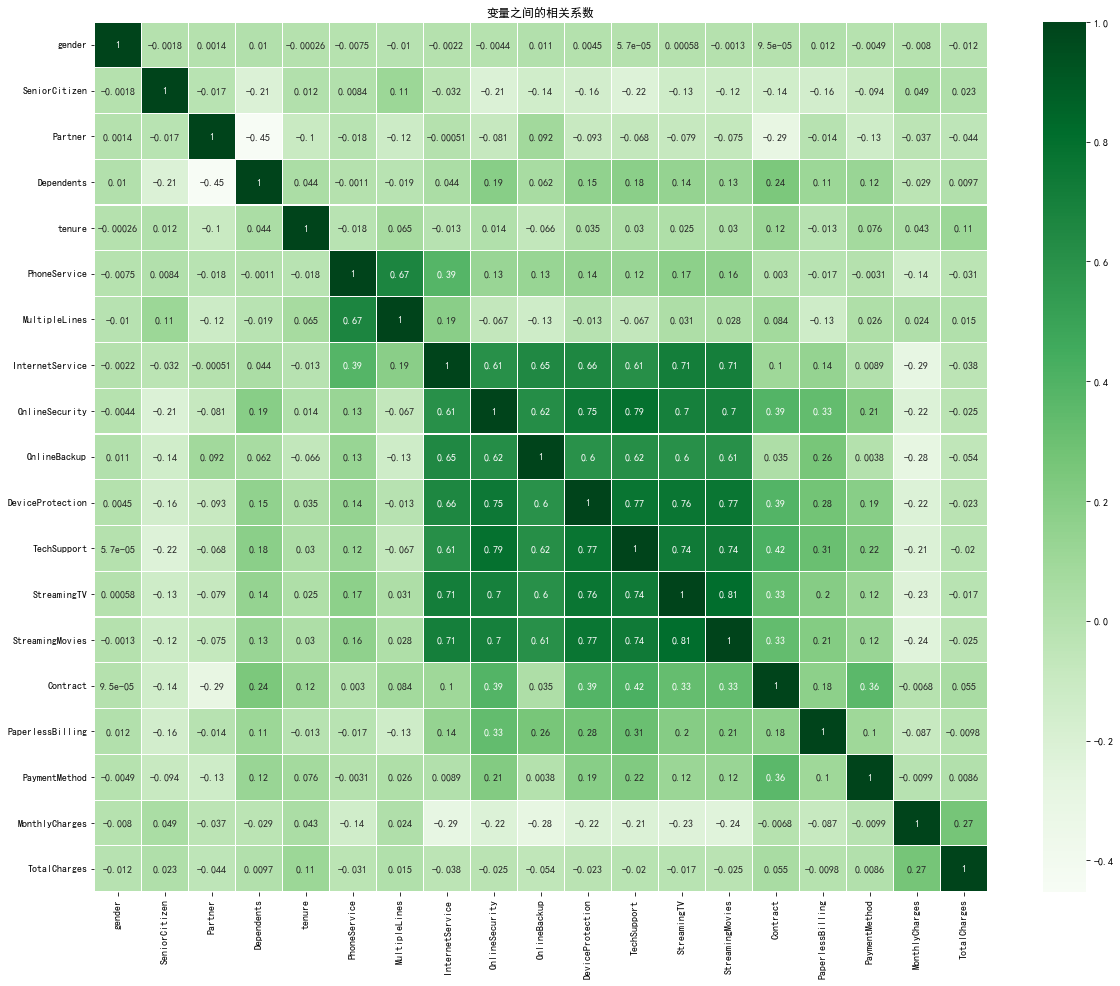

In [51]:
plt.figure(figsize=(20,16))
rcParams['axes.unicode_minus']=False
ax=sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.2,cmap='Greens',annot=True)
plt.title('变量之间的相关系数')

热力图中颜色越深代表两个变量之间的正相关系数越大，正相关性越强。又图中可看出，互联网服务、网络安全服务、在线备份业务、设备保护业务、技术支出服务、网络电视和网络电影之间存在较强的相关性，多线业务和电话服务之间也存在较强的相关性，并且均为正相关关系。

### 6. one-hot编码

In [54]:
data_dummies=pd.get_dummies(data.iloc[:,1:21])
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### 7. 电信用户是否流失与各变量之间的相关性

Text(0.5, 1.0, '用户是否流失与各变量之间的相关性')

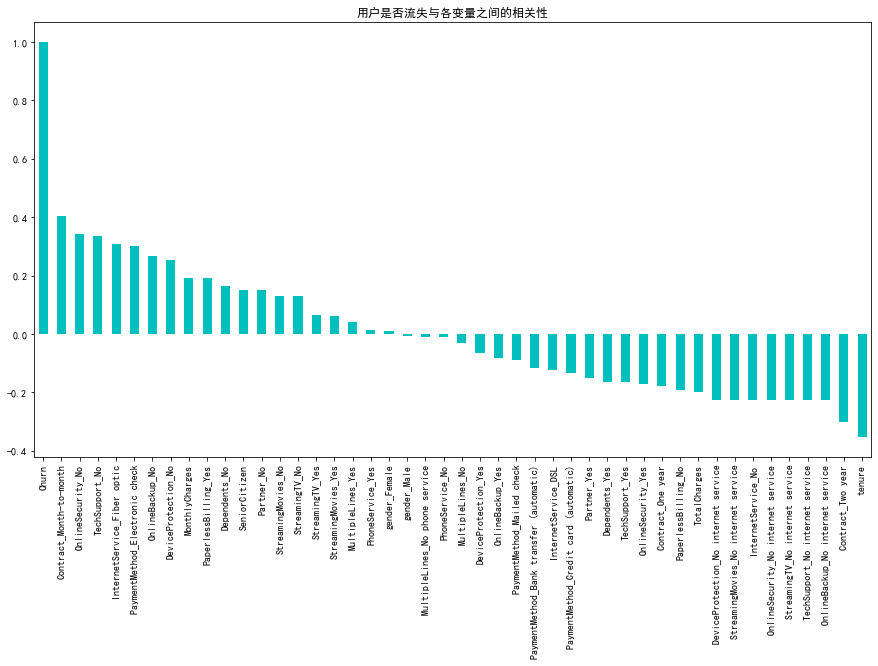

In [57]:
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.title('用户是否流失与各变量之间的相关性')

由上图可知电话服务和性别这两个变量和用户流失的相关性非常小，几乎接近于零，可不考虑这两个变量对用户流失的影响，可以直接剔除这两个变量。

### 8. 网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影和无网络服务对客户流失率的影响

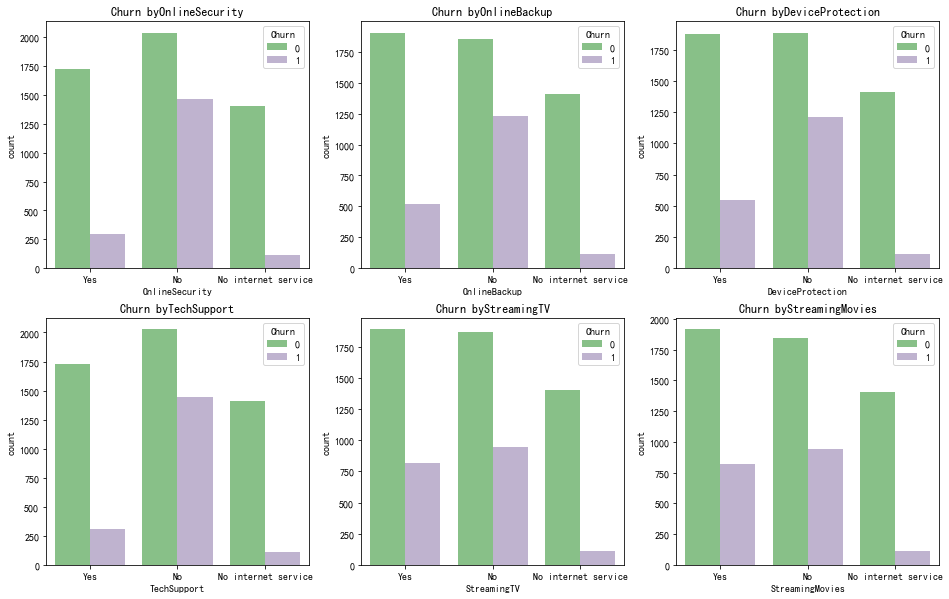

In [59]:
covariables=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i,item in enumerate(covariables):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue='Churn',data=data,palette='Accent',order=['Yes','No','No internet service'])
    plt.xlabel(str(item))
    plt.title('Churn by'+str(item))
    i = i+1

由上图可看到，未开通这些服务的用户流失量都很大。

### 9. 签订合同方式对客户流失率的影响

Text(0.5, 1.0, 'Churn by Contract type')

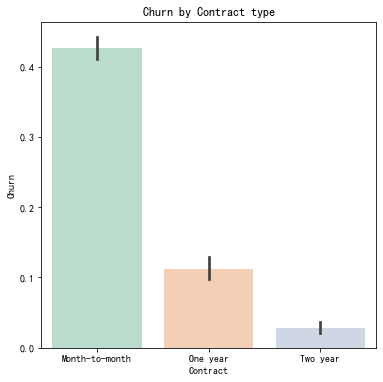

In [61]:
sns.barplot(x='Contract',y='Churn',data=data,palette='Pastel2',order=['Month-to-month','One year','Two year'])
plt.title('Churn by Contract type')

又上图可见，按月签订的客户流失人数最多，两天签订一次合同的客户流失人数最少，因此可加大签订长期合同的推广力度。

### 10. 付款方式对客户流失率的影响

Text(0.5, 1.0, 'Churn by PaymentMethod type')

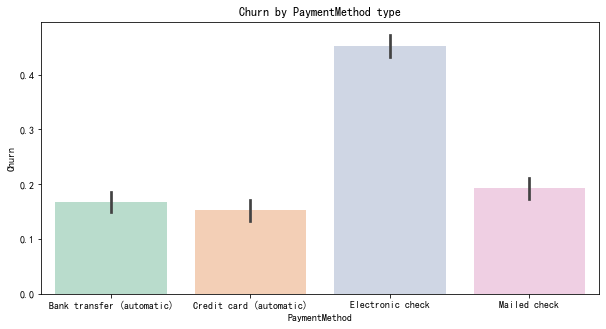

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod',y='Churn',data=data,palette='Pastel2',order=['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check'])
plt.title('Churn by PaymentMethod type')

由上图可知，使用电子支付方式的用户流失率最高，可以进一步设计实验来判断是否是电子支付流程中的某一环节出了问题，应与相关部门沟通此问题。

## 四、数据预处理

In [63]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


根据前面的分析可知，性别和电话服务这两个变量对用户流失的影响很小，应予以剔除，用户ID只是一些随机生成的字符，也可以剔除。

### 1. 剔除无关变量

In [65]:
data1=data.iloc[:,2:20]
data1.drop('PhoneService',axis=1,inplace=True)
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [66]:
customer_id=data['customerID']

如果数值型变量不经过标准化，那么在后面的模型中构建损失函数时会受到数值范围较大的变量的影响，因此下面对客户的职位、月费用和总费用进行标准化。（使用均值和方差缩放）

### 2. 标准化数值型变量

In [67]:
scaler=StandardScaler(copy=False)
scaler.fit_transform(data1[['tenure','MonthlyCharges','TotalCharges']])
#fit_transform的作用是先拟合数据，然后将拟合到的数据转化为标准形式

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [68]:
data1[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(data1[['tenure','MonthlyCharges','TotalCharges']])

在删除无关变量，标准化数值型变量之后，下面使用箱线图查看数值型变量是否存在异常值。

### 3. 检查异常值

Text(0.5, 1.0, '检查标准化后的客户职位、月费用和总费用是否存在异常值')

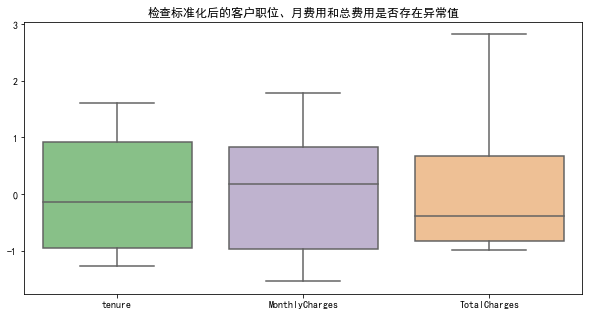

In [69]:
plt.figure(figsize=(10,5))
numbox=sns.boxplot(data=data1[['tenure','MonthlyCharges','TotalCharges']],palette='Accent')
plt.title('检查标准化后的客户职位、月费用和总费用是否存在异常值')

由上图可知，这三个变量不存在明显的异常值。

查看对象类型字段中存在的值

### 4. 替换部分字段

In [72]:
def uni(columnlabel):
    print(columnlabel,'->',data1[columnlabel].unique())
dataobject=data1.select_dtypes(['object'])
for i in range(0,len(dataobject.columns)):
    uni(dataobject.columns[i])

Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


根据之前的探索性分析可知，无互联网服务对客户的流失率影响十分小，No internet service和No可认为是一致的，因此下面将用No来代替No internet service

In [73]:
data1.replace(to_replace='No internet service',value='No',inplace=True)
data1.replace(to_replace='No phone service',value='No',inplace=True)
for i in range(0,len(dataobject.columns)):
    uni(dataobject.columns[i])

Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
MultipleLines -> ['No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes']
OnlineBackup -> ['Yes' 'No']
DeviceProtection -> ['No' 'Yes']
TechSupport -> ['No' 'Yes']
StreamingTV -> ['No' 'Yes']
StreamingMovies -> ['No' 'Yes']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [74]:
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,-1.280248,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194
1,0,No,No,0.064303,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740
2,0,No,No,-1.239504,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649
3,0,No,No,0.512486,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248
4,0,No,No,-1.239504,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457


目前已经完成了提出变量、标准化数值型变量、替换部分值，为了建立模型，下面需要将分类数据转换为整数编码（使用Scikit-learn标签编码）

### 5. 类别型变量编码

In [75]:
def labelencode(columnlabel):
    data1[columnlabel]=LabelEncoder().fit_transform(data1[columnlabel])
for i in range(0,len(dataobject.columns)):
    labelencode(dataobject.columns[i])
for i in range(0,len(dataobject.columns)):
    uni(dataobject.columns[i])

Partner -> [1 0]
Dependents -> [0 1]
MultipleLines -> [0 1]
InternetService -> [0 1 2]
OnlineSecurity -> [0 1]
OnlineBackup -> [1 0]
DeviceProtection -> [0 1]
TechSupport -> [0 1]
StreamingTV -> [0 1]
StreamingMovies -> [0 1]
Contract -> [0 1 2]
PaperlessBilling -> [1 0]
PaymentMethod -> [2 3 0 1]


## 五、构建模型

### 1. 建立训练数据集和测试数据集

In [83]:
X=data1
y=data['Churn'].values
sss=StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#原数据中训练集和测试集所占的比重为4:1，
#由于标签分布不均衡，因此选择交叉验证的方法，这里设定为五折交叉验证，即每次训练时，将训练集中的数据划分为5份，其中一份作为验证集

In [84]:
for train_index,test_index in sss.split(X,y):
    print('train:',train_index,'test:',test_index)
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]

train: [3780 1588 2927 ... 3956 6130 6814] test: [5126 2423 2498 ... 6703 6618 6010]
train: [6916 6953 5388 ... 6156 3262 3471] test: [4097 4734 2309 ... 1278 1724 5508]
train: [1218 2877 3756 ...  848 4568 6967] test: [ 133 1822 5303 ... 3150 5611 4569]
train: [2552 4723 2055 ... 4030 2165 1994] test: [ 233  438 4434 ... 4625 1121 3422]
train: [4040 1561 6463 ... 2550 6727 4009] test: [4581 3898 3153 ... 2095 1765 2249]


In [85]:
print('原始数据特征：',X.shape,'训练数据特征：',X_train.shape,'测试数据特征：',X_test.shape)
print('原始数据标签：',y.shape,'训练数据标签：',y_train.shape,'测试数据标签：',y_test.shape)

原始数据特征： (7032, 17) 训练数据特征： (5625, 17) 测试数据特征： (1407, 17)
原始数据标签： (7032,) 训练数据标签： (5625,) 测试数据标签： (1407,)


### 2.选择机器学习算法

In [86]:
Classifiers=[['Random Forest',RandomForestClassifier()],
             ['Support Vector Machine',SVC()],
             ['LogisticRegression',LogisticRegression()],
             ['KNN',KNeighborsClassifier(n_neighbors=5)],
             ['Naive Bayes',GaussianNB()],
             ['Decision Tree',DecisionTreeClassifier()],
             ['AdaBoostClassifier',AdaBoostClassifier()],
             ['GradientBoostingClassifier',GradientBoostingClassifier()],
             ['XGB',XGBClassifier()],
             ['CatBoost',CatBoostClassifier(logging_level='Silent')]
            ]

### 3. 训练模型

In [122]:
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier = classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1score=f1_score(y_test,y_pred)
    #class_eva=pd.DataFrame([recall,precision,f1score])
    Classify_result.append([recall,precision,f1score])
    #name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
F:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### 4. 评估模型

In [128]:
result=pd.DataFrame(Classify_result)
result.index=names
result.columns=['recall','precision','f1score']
result

,recall,precision,f1score
Random Forest,0.483957,0.641844,0.551829
Support Vector Machine,0.483957,0.688213,0.568289
LogisticRegression,0.548128,0.652866,0.595930
KNN,0.478610,0.561129,0.516595
Naive Bayes,0.740642,0.552894,0.633143
Decision Tree,0.491979,0.490667,0.491322
AdaBoostClassifier,0.548128,0.672131,0.603829
GradientBoostingClassifier,0.545455,0.673267,0.602659
XGB,0.516043,0.620579,0.563504
CatBoost,0.532086,0.658940,0.588757


由上表可知，朴素贝叶斯的F1分数为63.31%，选择此模型来预测用户是否流失效果比较好。

## 六、模型预测

In [129]:
#此数据集没有提供预测数据集，因此选取后十行作为需要预测的数据集
pred_X = data1.tail(10)
pre_id = customer_id.tail(10)
model = GaussianNB()
model.fit(X_train,y_train)
pred_y = model.predict(pred_X)
#输出预测结果
predDf = pd.DataFrame({'customerID':pre_id,'Churn':pred_y})
predDf

,customerID,Churn
7033,9767-FFLEM,1
7034,0639-TSIQW,0
7035,8456-QDAVC,1
7036,7750-EYXWZ,0
7037,2569-WGERO,0
7038,6840-RESVB,0
7039,2234-XADUH,0
7040,4801-JZAZL,0
7041,8361-LTMKD,1
7042,3186-AJIEK,0


## 七、结论

根据上述分析，我们可以得出如下结论：
（1）老年用户和没有配偶、经济不独立的学生用户更容易流失；  
（2）性别和电话服务对流失率几乎没有影响；  
（3）提供多线业务、互联网服务、网络安全服务、在线备份业务、设备保护业务等网络业务能够降低流失率；  
（4）签订合同的时长越短的用户越容易流失；  
（5）采用电子支付手段的用户比其他支付手段的用户更容易流失。  
另外根据用户流失预测模型，我们可以提前预测哪些用户可能会流失，精准定位到这些用户，为他们推送一些服务或对他们进行电话访问，从而降低流失率。